In [ ]:
# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [ ]:
# Importing Data

In [50]:
train_data=pd.read_csv('wbdata2014.csv',sep='/')

In [57]:
train_data

,Country,new.forest,Rural,log.CO2,log.GNI,log.Energy.2011,LifeExp,Fertility,InfMort,log.Exports,log.Imports,CellPhone,RuralWater,Pop
0,China,-5.929375,46.832,1.839733,8.651724,7.615477,75.199512,1.6630,10.9,3.350966,3.259900,88.708335,84.9,1.357380e+09
1,India,-2.735634,68.006,0.568836,7.346010,6.419537,66.210854,2.5050,41.4,3.172485,3.408213,70.783182,90.7,1.252140e+09
2,United States,-1.688899,18.723,2.871538,10.865707,8.858293,78.741463,1.8805,5.9,2.604613,2.844193,95.529547,98.0,3.161288e+08
3,Indonesia,4.636429,47.748,0.643540,8.137396,6.753775,70.607244,2.3700,24.5,3.271911,3.216865,121.543407,76.4,2.498656e+08
4,Brazil,3.222813,14.829,0.811049,9.362203,7.223405,73.617878,1.8110,12.3,2.475628,2.535485,135.305048,85.3,2.003619e+08
5,Pakistan,6.053449,62.140,0.031613,7.130899,6.177147,66.435878,3.2640,69.0,2.636213,2.942568,70.130376,89.0,1.821426e+08
6,Nigeria,7.231400,53.906,-0.520723,7.807917,6.580145,52.109024,6.0020,74.3,3.444570,3.066391,73.291962,49.1,1.736153e+08
7,Bangladesh,1.956693,67.247,-0.751701,6.721426,5.321645,70.294854,2.2080,33.2,3.131174,3.453487,67.084534,84.4,1.565950e+08
8,Russian Federation,-0.179278,26.149,2.511694,9.452502,8.539587,70.460976,1.5900,8.6,3.410135,3.078918,152.835352,92.2,1.434999e+08
9,Japan,-0.432173,7.509,2.228470,10.772477,8.191566,83.096098,1.4100,2.1,2.716518,2.774736,115.188593,100.0,1.273386e+08


In [52]:
train_data.shape

(80, 14)

In [53]:
# Preprocessing data

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
Country            80 non-null object
new.forest         78 non-null float64
Rural              78 non-null float64
log.CO2            78 non-null float64
log.GNI            78 non-null float64
log.Energy.2011    78 non-null float64
LifeExp            78 non-null float64
Fertility          78 non-null float64
InfMort            78 non-null float64
log.Exports        78 non-null float64
log.Imports        78 non-null float64
CellPhone          78 non-null float64
RuralWater         78 non-null float64
Pop                78 non-null float64
dtypes: float64(13), object(1)
memory usage: 8.8+ KB


In [55]:
train_data.isnull().sum()

Country            0
new.forest         2
Rural              2
log.CO2            2
log.GNI            2
log.Energy.2011    2
LifeExp            2
Fertility          2
InfMort            2
log.Exports        2
log.Imports        2
CellPhone          2
RuralWater         2
Pop                2
dtype: int64

In [58]:
# Dropping Null Values

In [59]:
train_data.dropna(inplace=True)

In [60]:
train_data.isnull().sum()

Country            0
new.forest         0
Rural              0
log.CO2            0
log.GNI            0
log.Energy.2011    0
LifeExp            0
Fertility          0
InfMort            0
log.Exports        0
log.Imports        0
CellPhone          0
RuralWater         0
Pop                0
dtype: int64

In [61]:
train_data.dtypes

Country             object
new.forest         float64
Rural              float64
log.CO2            float64
log.GNI            float64
log.Energy.2011    float64
LifeExp            float64
Fertility          float64
InfMort            float64
log.Exports        float64
log.Imports        float64
CellPhone          float64
RuralWater         float64
Pop                float64
dtype: object

In [62]:
cat=[i for i in train_data.columns if train_data[i].dtype=='object']
cat

['Country']

In [63]:
num=[i for i in train_data.columns if train_data[i].dtype!='object']
num

['new.forest',
 'Rural',
 'log.CO2',
 'log.GNI',
 'log.Energy.2011',
 'LifeExp',
 'Fertility',
 'InfMort',
 'log.Exports',
 'log.Imports',
 'CellPhone',
 'RuralWater',
 'Pop']

In [67]:
# Visualizing Data

def viz(a,b):
    sns.scatterplot(x=a,y=b,data=train_data)
    plt.show

In [68]:
train_data.columns

Index(['Country', 'new.forest', 'Rural', 'log.CO2', 'log.GNI',
       'log.Energy.2011', 'LifeExp', 'Fertility', 'InfMort', 'log.Exports',
       'log.Imports', 'CellPhone', 'RuralWater', 'Pop'],
      dtype='object')

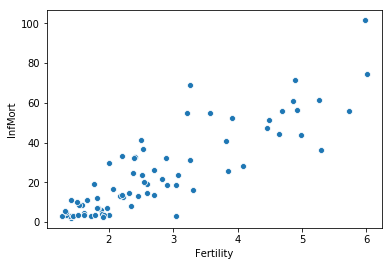

In [70]:
viz('Fertility','InfMort')

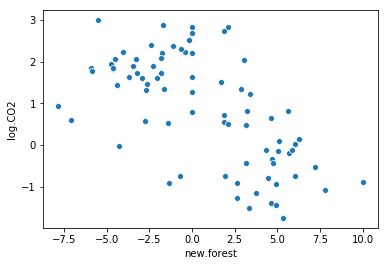

In [71]:
viz('new.forest','log.CO2')

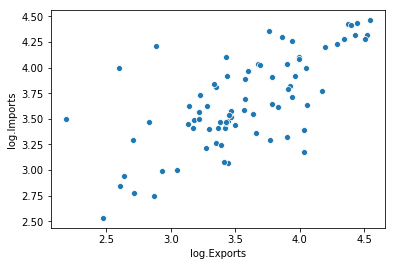

In [72]:
viz('log.Exports','log.Imports')

In [73]:
# Seperating Dependent and Independent Columns

In [74]:
X= train_data.drop('Country',axis=1)
X.head()

,new.forest,Rural,log.CO2,log.GNI,log.Energy.2011,LifeExp,Fertility,InfMort,log.Exports,log.Imports,CellPhone,RuralWater,Pop
0,-5.929375,46.832,1.839733,8.651724,7.615477,75.199512,1.6630,10.9,3.350966,3.259900,88.708335,84.9,1.357380e+09
1,-2.735634,68.006,0.568836,7.346010,6.419537,66.210854,2.5050,41.4,3.172485,3.408213,70.783182,90.7,1.252140e+09
2,-1.688899,18.723,2.871538,10.865707,8.858293,78.741463,1.8805,5.9,2.604613,2.844193,95.529547,98.0,3.161288e+08
3,4.636429,47.748,0.643540,8.137396,6.753775,70.607244,2.3700,24.5,3.271911,3.216865,121.543407,76.4,2.498656e+08
4,3.222813,14.829,0.811049,9.362203,7.223405,73.617878,1.8110,12.3,2.475628,2.535485,135.305048,85.3,2.003619e+08


In [87]:
y= train_data['Country'].values
y

array(['China', 'India', 'United States', 'Indonesia', 'Brazil',
       'Pakistan', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan',
       'Mexico', 'Philippines', 'Ethiopia', 'Vietnam', 'Germany',
       'Turkey', 'Thailand', 'France', 'United Kingdom', 'Italy',
       'South Africa', 'Tanzania', 'Colombia', 'Spain', 'Ukraine',
       'Kenya', 'Algeria', 'Sudan', 'Canada', 'Iraq', 'Morocco', 'Peru',
       'Uzbekistan', 'Malaysia', 'Saudi Arabia', 'Nepal', 'Ghana',
       'Mozambique', 'Australia', 'Cameroon', 'Angola', 'Sri Lanka',
       "Cote d'Ivoire", 'Chile', 'Kazakhstan', 'Netherlands', 'Ecuador',
       'Guatemala', 'Cambodia', 'Zambia', 'Zimbabwe', 'Senegal',
       'Belgium', 'Greece', 'Tunisia', 'Bolivia', 'Czech Republic',
       'Portugal', 'Dominican Republic', 'Benin', 'Haiti', 'Hungary',
       'Sweden', 'Belarus', 'Azerbaijan', 'United Arab Emirates',
       'Austria', 'Tajikistan', 'Honduras', 'Switzerland', 'Israel',
       'Bulgaria', 'Serbia', 'Togo', 'Par

In [75]:
# Scaling Data

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [78]:
X

array([[-1.64572362,  0.33682897,  0.75271957, ..., -0.62085732,
         0.15421143,  6.16197042],
       [-0.84399115,  1.36157985, -0.22743207, ..., -1.20949508,
         0.46290722,  5.65490908],
       [-0.5812266 , -1.02355275,  1.54847618, ..., -0.39685793,
         0.85143813,  1.145093  ],
       ...,
       [-0.15725813, -1.11715189,  0.30962372, ...,  1.12247878,
         0.45226253, -0.34693475],
       [ 1.12784411, -0.27330773, -0.58921105, ...,  0.93829225,
        -0.05335988, -0.34750592],
       [ 1.30899673,  0.09591039, -0.76385655, ...,  0.14335847,
        -0.75590892, -0.34875852]])

In [79]:
import scipy.cluster.hierarchy as sch

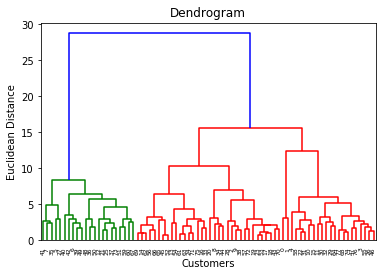

In [80]:
dendrogram= sch.dendrogram(sch.linkage(X,method='ward')) # Ward tries to minimize the variance in clusters

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [81]:
from sklearn.cluster import AgglomerativeClustering

In [84]:
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean' , linkage='ward')

In [85]:
y_hc=hc.fit_predict(X)

In [89]:
y_hc.shape

(78,)

In [90]:
y.shape

(78,)

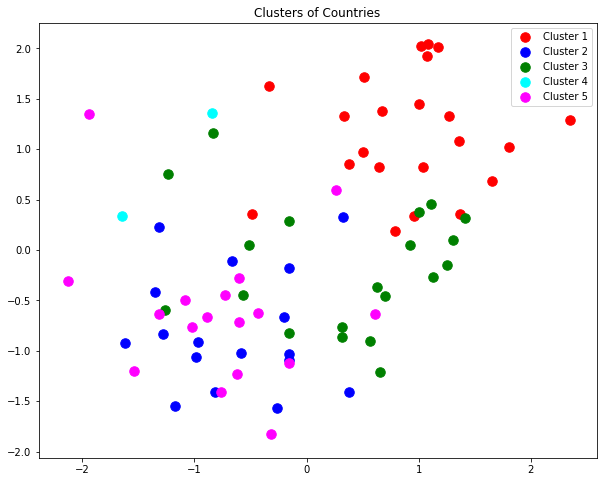

In [91]:
# Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 90, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 90, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 90, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 90, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 90, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Countries')
plt.legend()
plt.show()

In [111]:
i=pd.DataFrame(y,columns=['Countries'])
j=pd.DataFrame(y_hc,columns=['Cluster Label'])
k=[i,j]


In [114]:
result = pd.concat(k,axis=1)

In [117]:
result.sort_values('Cluster Label')

,Countries,Cluster Label
39,Cameroon,0
27,Sudan,0
21,Tanzania,0
37,Mozambique,0
51,Senegal,0
59,Benin,0
60,Haiti,0
41,Sri Lanka,0
67,Tajikistan,0
40,Angola,0
